In [245]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io as sio
import time
from sklearn.model_selection import train_test_split
from IPython.display import clear_output

# 1. Load data

In [246]:
dataset = sio.loadmat("ex7data1.mat")
X = dataset["X"]

# 2. Define necessary functions

In [247]:
# X: training set, M: list of centroids
# Returns: y (labels for each of X)
def clusterAssignment(X, M):
    y = np.zeros((X.shape[0],))
    for i in range(X.shape[0]):
        x = X[i, :]
        distances = np.linalg.norm(M - x, axis=1)
        j = np.argmin(distances)
        y[i] = j
    return y

# X: training set, y: previously predicted labels
# Returns: m (new centroids)
def moveCentroid(X, y, k):
    M = np.zeros((k, X.shape[1]))
    for j in range(k):
        m = np.mean(X[y == j, :], axis=0)
        M[j, :] = m
    return M

In [248]:
def randomInitCentroids(X, k):
    r = np.random.randint(0, X.shape[0], k)
    return X[r, :]

In [249]:
def visualizeData(X, y, m = None):
    for i in np.unique(y):
        plt.scatter(X[y == i, 0], X[y == i, 1], label=i)
    if m is not None:
        plt.scatter(m[:, 0], m[:, 1], c='k')
    plt.show()

In [250]:
def runkMeans(X, k, max_iters=100):
    m = randomInitCentroids(X, k)

    for i in range(max_iters):
        y = clusterAssignment(X, m)
        visualizeData(X, y, m)
        m_new = moveCentroid(X, y, k)
        if np.linalg.norm(m - m_new) < 1e-3:
            break
        m = m_new
        time.sleep(0.5)
        clear_output(wait=True)

    return m

# 3. Test

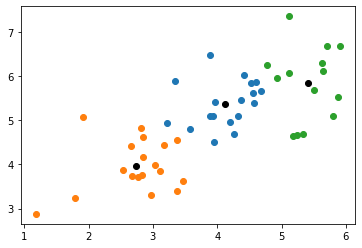

array([[4.1284457 , 5.38337785],
       [2.74403139, 3.97163677],
       [5.41133402, 5.83928781]])

In [251]:
runkMeans(X, 3)